In [ ]:
!pip install -q sklearn
!pip install torch torchvision
!pip3 install torchsummary
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install tensorflow==2.7.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#os.chdir('drive/Shareddrives/WIKM') #run this line (and comment below) if drive in ur shared drives
os.chdir('//content//drive//My Drive//WIKM')

In [ ]:
!ls

 data				       patchedImagesPNG256x256.zip
 lung_histopathology_bench_best.hdf5   patchedImagesPNG512x512
 __MACOSX			       Test_Images
 maskedImages			       vgg_bone_model_100epoch.h5
 normMaskedImages		      'WIKMM notes.gdoc'
'notes and articles'		      'WIKMM (update).gslides'
 OsteosarcomaData		      'WIKM new test.ipynb'
 output				       WIKMproject.ipynb
 patchedImagesPNG256x256	      'WIKM Test.ipynb'


In [ ]:
! pip install patchify

In [ ]:
!unzip /content/drive/MyDrive/WIKM/patchedImagesPNG256x256.zip 

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Test/both')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Test/in_situ')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Test/invasive')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Test/normal')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Train/both')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Train/in_situ')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Train/invasive')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/__MACOSX/patchedImagesPNG256x256/Train/normal')))

189
189
188
189
4348
4305
4357
25100


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import argparse
import cv2
from google.colab.patches import cv2_imshow
import pathlib
import os
import json
from matplotlib.pyplot import imshow 
from pathlib import Path
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
import shutil
#import patchify
from google.colab import files
from PIL import Image
#import py_wsi
#import py_wsi.imagepy_toolkit as tk

combining images and csv from osteo

In [ ]:
upload_local = files.upload()

In [ ]:
import os
import csv
import sys
import errno
import shutil

def copy_rename(src_dir, dst_dir, csv_path=None):
    if csv_path is None:
        csv_path = os.path.join(dst_dir, 'PathologistValidation.csv')

    with open(csv_path, mode='rb') as csvfile:    
        Reader = csv.reader(csvfile, delimiter = ',')
        for row in Reader:
            oldname = row[0]
            newname = row[1] + os.path.splitext(oldname)[1]
            oldpath = os.path.join(src_dir, oldname)
            newpath = os.path.join(dst_dir, newname)
            try:
                # the rename is implicit in the copy operation
                shutil.copy(oldpath, newpath)
            except OSError as e:
                # only raise exception if it is something other than the file
                # not existing
                if e.errno != errno.ENOENT:
                    raise

#src_dir= r"C:\Transformer-SSBI\Originals"
#dst_dir= r"C:\Transformer-SSBI\Newnames"
#copy_rename(src_dir, dst_dir)


In [ ]:
directory = '/content/drive/MyDrive/Osteosarcoma-UT/Training-Set-original'

os.chdir(directory)
bonespath = pathlib.Path(directory)


for imgset in bonespath.iterdir():
  os.chdir(directory)
  imgpath = pathlib.Path(directory, imgset)

  for img in imgpath.iterdir():
    if filename.endswith('.csv'):
      bones_csv = pd.read_csv('PathologistValidation.csv', header = None)
      
      for index, row in breads_df.iterrows():
        image_path = Path('{}.jpg'.format(row[0]))

        if not image_path.is_file():
          print('could not find file {}. skipping...'.format(image_path))
          continue

        bones_dir = Path(row[1])
        if not bones_dir.is_dir():
          bones_dir.mkdir()

        image_path.shutil.copyfile(directory,bones_dir)
        


In [ ]:
original_wsi_dir = '/content/drive/MyDrive/WIKM/data/LungCancer'

os.chdir(original_wsi_dir)
original_wsi_path = pathlib.Path(original_wsi_dir)

for patientnum in original_wsi_path.iterdir():
  os.chdir(original_wsi_dir)
  patientnum_path = pathlib.Path(original_wsi_dir, patientnum)

  for slidefolder in patientnum_path.iterdir():
    slidepath = pathlib.Path(patientnum_path, slidefolder)
    if slidefolder in ['annotations', 'images']:
      print(slidefolder)

      for mask_and_wsi in sorted(slidepath.iterdir()):
        os.chdir(mask_and_wsi.parent)
        print('--Opening Image--', mask_and_wsi.absolute())
        image = cv2.imread(str(mask_and_wsi.absolute()))


NameError: ignored

In [ ]:
directory = '/content/drive/MyDrive/Osteosarcoma-UT/Training-Set-original'

os.chdir(directory)
bonespath = pathlib.Path(directory)


for imgset in bonespath.iterdir():
  os.chdir(directory)
  imgpath = pathlib.Path(directory, imgset)

  for img in imgpath.iterdir():
    if filename.endswith('.csv'):
      src_dir = imgpath
      dst_dir = '/content/drive/MyDrive/Osteosarcoma-UT/Training-Set-csv-combined'
      copy_rename(src_dir, dst_dir)
      
        


In [ ]:
path_LungFCP_01_0001_b1_image = r'/content/drive/MyDrive/WIKM/data/LungCancer/LungFCP-01-0001/images/LungFCP-01-0001_b1.tiff'

path_LungFCP_01_0001_b1_mask = r'/content/drive/MyDrive/WIKM/data/LungCancer/LungFCP-01-0001/annotations/LungFCP-01-0001_b1_annotation_00_R000G255B000.tiff'

image_LungFCP_01_0001_b1  = cv2.imread(path_LungFCP_01_0001_b1_image, 1) 

image_LungFCP_01_0001_b1_annotation_00_R000G255B000 = cv2.imread(path_LungFCP_01_0001_b1_mask, 1) 

source = image_LungFCP_01_0001_b1

src2 = image_LungFCP_01_0001_b1_annotation_00_R000G255B000

src2 = cv2.resize(image_LungFCP_01_0001_b1, src2.shape[1::-1])

#print(src2.shape)

#print(src2.dtype)

masked = cv2.bitwise_and(image_LungFCP_01_0001_b1, src2)
#cv2_imshow(masked)

'''
#make black region transparent
tmp = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
b, g, r = cv2.split(masked)
rgba = [b, g, r, alpha]
masked_tr = cv2.merge(rgba, 4)

cv2_imshow(masked_tr)


#img2gray = cv2.cvtColor(source2,cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

dst = cv2.resize(source, mask_inv.shape[1::-1])


img2_fg = cv2.bitwise_and(dst, mask_inv)

#dst = cv2.add(image_LungFCP_01_0001_b1,img2_fg)


cv2_imshow(img2_fg)
'''

'\n#make black region transparent\ntmp = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)\n_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)\nb, g, r = cv2.split(masked)\nrgba = [b, g, r, alpha]\nmasked_tr = cv2.merge(rgba, 4)\n\ncv2_imshow(masked_tr)\n\n\n#img2gray = cv2.cvtColor(source2,cv2.COLOR_BGR2GRAY)\n#ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)\nmask_inv = cv2.bitwise_not(mask)\n\ndst = cv2.resize(source, mask_inv.shape[1::-1])\n\n\nimg2_fg = cv2.bitwise_and(dst, mask_inv)\n\n#dst = cv2.add(image_LungFCP_01_0001_b1,img2_fg)\n\n\ncv2_imshow(img2_fg)\n'

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (95252416 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


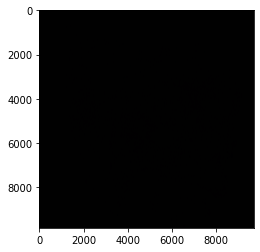

In [ ]:
# --- load example patch
dat = np.array(Image.open(path_LungFCP_01_0001_b1_image))

# --- create mask (0 = label, 1 = background)
lbl = (dat > 0).astype('uint8')
#imshow(lbl[..., 0])

# --- create patches of 16x16
PATCH_SIZE = 256
LBL_OF_INTEREST = 1

y_min, x_min = 0, 0
y_max, x_max = PATCH_SIZE, PATCH_SIZE

# --- calculate number of iterations for y and x axis
y_itrs = int(dat.shape[0] / PATCH_SIZE)
x_itrs = int(dat.shape[1] / PATCH_SIZE)

for y in range(y_itrs):
    
    for x in range(x_itrs):
        
        # --- crop (256, 256, 3) patch
        dat_patch = dat[y_min : y_max, x_min: x_max, :]
        lbl_patch = lbl[y_min : y_max, x_min: x_max, :]
        
        # --- check if patch is part of the group we want
        indexes, counts = np.unique(lbl_patch, return_counts=True)
        
        # --- example: want patches with more group 1
        if LBL_OF_INTEREST in indexes:
            
            # --- check if majority of cropped label is label of interest
            if indexes[np.argmax(counts)] == LBL_OF_INTEREST:
                
                # --- save patch
                #np.save('/content/drive/MyDrive/WIKM/Test_Images', patch)
                pass
            
        x_min += PATCH_SIZE
        x_max += PATCH_SIZE
    
    # --- reset x_min and x_max
    x_min = 0
    x_max = PATCH_SIZE
    
    y_min += PATCH_SIZE
    y_max += PATCH_SIZE

In [ ]:
lbl.shape

(9832, 9688, 3)

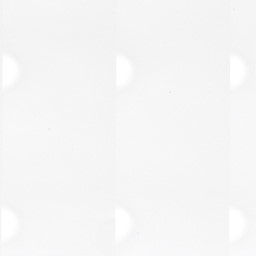

In [ ]:
cv2_imshow(dat_patch)

In [ ]:
mask_inv = cv2.bitwise_not(image_LungFCP_01_0001_b1_annotation_00_R000G255B000)

#cv2_imshow(mask_inv)

In [ ]:
mask_inv.shape

(9832, 9688, 3)

In [ ]:
pathm = r'/content/drive/MyDrive/WIKM/data/LungCancer/LungFCP-01-0001/annotations/LungFCP-01-0001_b1_annotation_00_R000G255B000.tiff'
pathm1 = r'/content/drive/MyDrive/WIKM/data/LungCancer/LungFCP-01-0001/annotations/LungFCP-01-0001_b1_annotation_00_R255G000B000.tiff'

imgm = cv2.imread(pathm, 1)
imgm1 = cv2.imread(pathm1, 1)

dst = cv2.resize(imgm, imgm1.shape[1::-1])

combmask = cv2.bitwise_and(imgm1, dst)

#cv2_imshow(combmask)

In [ ]:
mask_inv = cv2.bitwise_not(image_LungFCP_01_0001_b1_annotation_00_R000G255B000)
#cv2_imshow(mask_inv)
dst = cv2.resize(mask_inv, image_LungFCP_01_0001_b1.shape[1::-1])

rev_mask = cv2.bitwise_and(image_LungFCP_01_0001_b1, dst)


#cv2.imwrite('/content/drive/MyDrive/WIKM/rev_mask.tiff', rev_mask)
#cv2_imshow(rev_mask)



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-1c0639ebd48d>", line 1, in <module>
    mask_inv = cv2.bitwise_not(image_LungFCP_01_0001_b1_annotation_00_R000G255B000)
NameError: name 'image_LungFCP_01_0001_b1_annotation_00_R000G255B000' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of

NameError: ignored

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights= None)
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (95252416 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


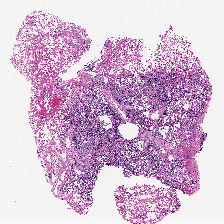

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = path_LungFCP_01_0001_b1_image
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size= (224,224))
display(img)

In [ ]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [ ]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
p

[[('n02794156', 'barometer', 0.0025898193),
  ('n03976467', 'Polaroid_camera', 0.0020807348),
  ('n15075141', 'toilet_tissue', 0.0020484237),
  ('n04019541', 'puck', 0.0019584664),
  ('n03063689', 'coffeepot', 0.0019494464)]]

In [ ]:
from zipfile import ZipFile
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
import shutil
%matplotlib inline

In [ ]:
for name in glob('/content/drive/MyDrive/WIKM/patchedImages/patient*/*/*'):
    print(name)

In [ ]:
RootDir1 = r'/content/drive/MyDrive/Osteosarcoma-UT/Training-Set-1'
TargetFolder = r'/content/drive/MyDrive/Osteosarcoma-UT/Train'
for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

In [ ]:
RootDir2 = r'/content/drive/MyDrive/Osteosarcoma-UT/Training-Set-2'
TargetFolder2 = r'/content/drive/MyDrive/Osteosarcoma-UT/Test'
for root, dirs, files in os.walk((os.path.normpath(RootDir2)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder1 = os.path.join(root,name)
                shutil.copy2(SourceFolder1, TargetFolder2) #copies csv to new folder

In [ ]:
RootDir3 = r'/content/drive/MyDrive/Osteosarcoma-UT/set12'
TargetFolder3 = r'/content/drive/MyDrive/Osteosarcoma-UT/Validation'
for root, dirs, files in os.walk((os.path.normpath(RootDir3)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder2 = os.path.join(root,name)
                shutil.copy2(SourceFolder2, TargetFolder3) #copies csv to new folder

In [ ]:
s = 32
image_size = [224,224]
trainGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, rotation_range = 40, width_shift_range=0.2)

In [ ]:
train_set=trainGen.flow_from_directory('/content/drive/MyDrive/Osteosarcoma-UT/Train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')
test_set=trainGen.flow_from_directory('/content/drive/MyDrive/Osteosarcoma-UT/Test', target_size = (224,224), batch_size = 32, class_mode = 'categorical')
val_set=trainGen.flow_from_directory('/content/drive/MyDrive/Osteosarcoma-UT/Validation', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
  
# The kernel to be used for dilation 
# purpose
#kernel = np.ones((5, 5), np.uint8)
  
# converting the image to HSV format
#hsv = cv2.cvtColor(image_LungFCP_01_0001_b1, cv2.COLOR_BGR2HSV)
  
# defining the lower and upper values
# of HSV, this will detect yellow colour
#Lower_hsv = np.array([20, 70, 100])
#Upper_hsv = np.array([30, 255, 255])
  
# creating the mask
#Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
  
# Inverting the mask 
mask_inv = cv2.bitwise_not(masked)
Mask = cv2.bitwise_and(image_LungFCP_01_0001_b1, mask_inv)
  
# Displaying the image
img1 = image.load_img(Mask,color_mode='rgb', target_size= (224,224))
display(img1)
  

FileNotFoundError: ignored

In [ ]:
!pip install imgaug

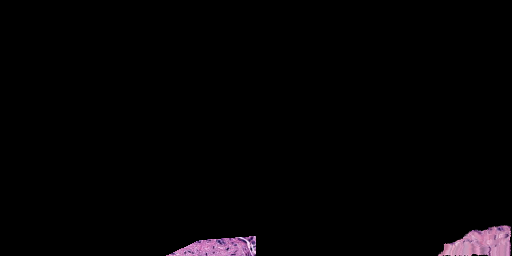

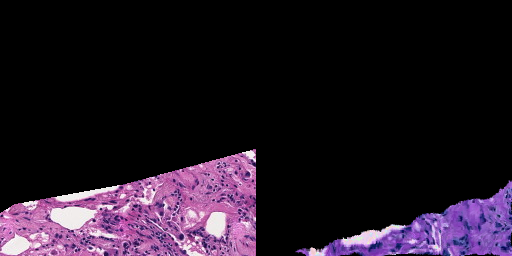

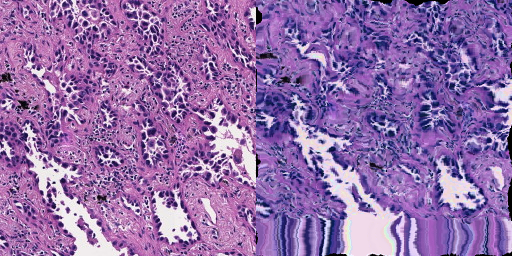

In [ ]:
from imgaug.augmenters.arithmetic import AdditiveGaussianNoise
import imgaug as ia
from imgaug import augmenters as iaa

p1_both_patch1_path = r'/content/drive/MyDrive/WIKM/patchedImages/patient1/both/Patch1.tiff'

p1_both_patch10_path = r'/content/drive/MyDrive/WIKM/patchedImages/patient1/both/Patch10.tiff'

p1_both_patch100_path = r'/content/drive/MyDrive/WIKM/patchedImages/patient1/both/Patch100.tiff'

p1_both_patch1 = cv2.imread(p1_both_patch1_path, 1)

p1_both_patch10 = cv2.imread(p1_both_patch10_path, 1)

p1_both_patch100 = cv2.imread(p1_both_patch100_path, 1)

seq = iaa.Sequential([
    iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),  # crop and pad images
    iaa.AddToHueAndSaturation((-60, 60)),  # change their color
    iaa.ElasticTransformation(alpha=90, sigma=9)  # water-like effecf
    ], random_order=True)

# load images with different sizes
different_patches = [
    p1_both_patch1,
    p1_both_patch10,
    p1_both_patch100
]

# augment them as one batch
images_aug = seq(images=different_patches)

cv2_imshow(np.hstack([different_patches[0], images_aug[0]]))

cv2_imshow(np.hstack([different_patches[1], images_aug[1]]))

cv2_imshow(np.hstack([different_patches[2], images_aug[2]]))

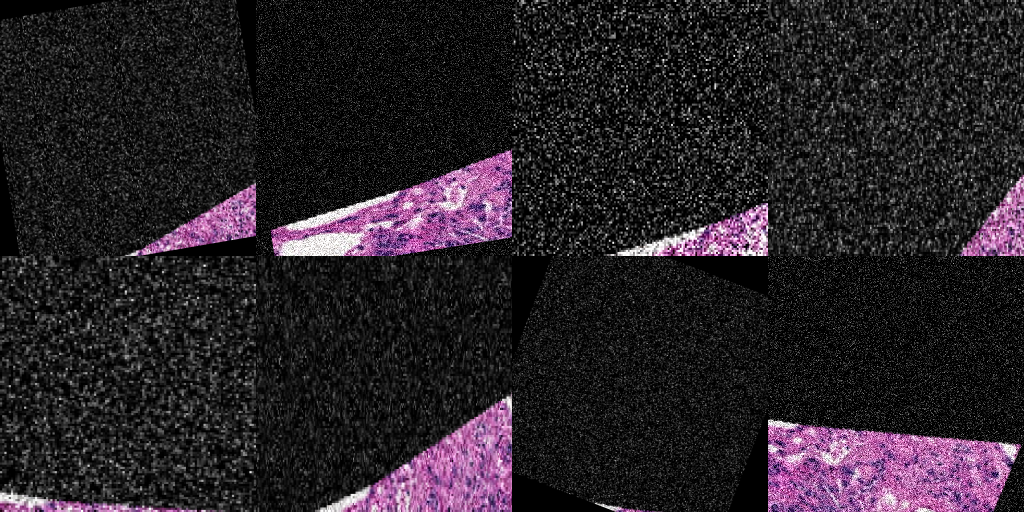

In [ ]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale = (30, 90)),
    iaa.Crop(percent = (0, 0.4))],
    random_order = True)

different_patches = [ p1_both_patch1, 
                    p1_both_patch10,
                    p1_both_patch100]

images_aug2 = [seq(image = p1_both_patch10) for _ in range(8)]

cv2_imshow(ia.draw_grid(images_aug2, cols = 4, rows = 2))





In [ ]:
9832/256

38.40625

In [ ]:
from patchify import patchify, unpatchify


patches = patchify(im, (100, 100, 3), step = 1)


patches.shape





(9733, 9589, 1, 100, 100, 3)
(9832, 9688, 3)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

In [ ]:
VGGIMAGE_SIZE = [224, 224]

datagen = ImageDataGenerator(rotation_range=180, horizontal_flip=True, vertical_flip=True, fill_mode='wrap',validation_split=0.2)

training_set = datagen.flow_from_directory(directory = 'OsteosarcomaData', target_size = (224, 224), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='training')
val_set = datagen.flow_from_directory(directory = 'OsteosarcomaData', target_size = (224, 224), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='validation')

Found 836 images belonging to 3 classes.
Found 207 images belonging to 3 classes.


In [ ]:
vgg = VGG16(input_shape = VGGIMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/WIKM/OsteosarcomaData/*')

x = Flatten()(vgg.output)

In [ ]:
x.shape

TensorShape([None, 25088])

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
#model.summary()
from tensorflow import losses, optimizers
#loss = losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = optimizers.Adam(learning_rate=1e-4)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy'])

In [ ]:
step_size_train = training_set.n//training_set.batch_size
step_size_valid = val_set.n//val_set.batch_size

with tf.device('/device:GPU:0'):
  vgg_model_train = model.fit_generator(
      generator = training_set,
      validation_data = val_set,
      epochs = 12,
      steps_per_epoch = step_size_train,
      validation_steps = step_size_valid,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/12
26/26 [==============================] - 31s 1s/step - loss: 0.9254 - accuracy: 0.8858 - val_loss: 3.1016 - val_accuracy: 0.7344
Epoch 2/12
26/26 [==============================] - 30s 1s/step - loss: 1.0741 - accuracy: 0.9005 - val_loss: 2.3274 - val_accuracy: 0.7917
Epoch 3/12
26/26 [==============================] - 30s 1s/step - loss: 0.8486 - accuracy: 0.9030 - val_loss: 3.2001 - val_accuracy: 0.7083
Epoch 4/12
26/26 [==============================] - 30s 1s/step - loss: 0.7802 - accuracy: 0.9092 - val_loss: 3.1804 - val_accuracy: 0.7448
Epoch 5/12
26/26 [==============================] - 30s 1s/step - loss: 0.8528 - accuracy: 0.9067 - val_loss: 2.4954 - val_accuracy: 0.7552
Epoch 6/12
26/26 [==============================] - 30s 1s/step - loss: 0.6635 - accuracy: 0.9129 - val_loss: 3.5625 - val_accuracy: 0.7135
Epoch 7/12
26/26 [==============================] - 30s 1s/step - loss: 0.6672 - accuracy: 0.9117 - val_loss: 3.0354 - val_accuracy: 0.6927
Epoch 8/12
26/26 [==

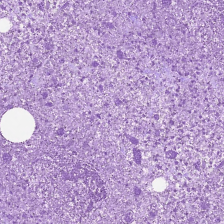

In [ ]:
xs, ys = next(training_set)

cv2_imshow(xs[0])

In [ ]:
logits = model.predict(xs)

pred = np.argmax(logits, axis=1)

df = pd.DataFrame(index=np.arange(pred.size))

# --- Define columns
df['true'] = ys[:, 0]
df['pred'] = pred
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())

NameError: ignored

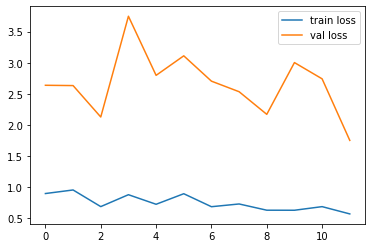

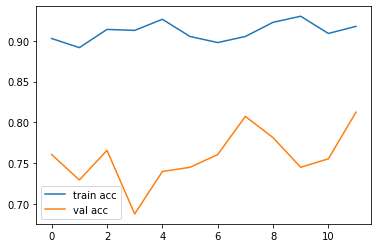

In [ ]:
# plot the loss
plt.plot(vgg_model_train.history['loss'], label='train loss')
plt.plot(vgg_model_train.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(vgg_model_train.history['accuracy'], label='train acc')
plt.plot(vgg_model_train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


CNN Bone

In [ ]:
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.python.keras import Sequential
from keras.models import Model
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

In [ ]:
datagen = ImageDataGenerator(rotation_range=180, horizontal_flip=True, vertical_flip=True, fill_mode='wrap',validation_split=0.2)

training_set = datagen.flow_from_directory(directory = 'OsteosarcomaData', target_size = (256, 256), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='training')
val_set = datagen.flow_from_directory(directory = 'OsteosarcomaData', target_size = (256, 256), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='validation')

Found 836 images belonging to 3 classes.
Found 207 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256,256,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
#model.summary()
from tensorflow import losses, optimizers
#loss = losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)


model.compile(optimizer= 'adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
step_size_train = training_set.n//training_set.batch_size
step_size_valid = val_set.n//val_set.batch_size

#with tf.device('/device:GPU:0'):
model_CNN_train = model.fit(
    training_set,
    validation_data = val_set,
    epochs = 12,
    steps_per_epoch = step_size_train,
    validation_steps = step_size_valid)

Epoch 1/12
26/26 [==============================] - 499s 19s/step - loss: 0.8516 - accuracy: 0.6231 - val_loss: 1.1504 - val_accuracy: 0.4427
Epoch 2/12
26/26 [==============================] - 501s 19s/step - loss: 0.8396 - accuracy: 0.6157 - val_loss: 0.9802 - val_accuracy: 0.4583
Epoch 3/12
26/26 [==============================] - 502s 19s/step - loss: 0.8180 - accuracy: 0.6294 - val_loss: 0.9231 - val_accuracy: 0.4792
Epoch 4/12
26/26 [==============================] - 494s 19s/step - loss: 0.8208 - accuracy: 0.6517 - val_loss: 1.1067 - val_accuracy: 0.4792
Epoch 5/12
26/26 [==============================] - 500s 19s/step - loss: 0.8058 - accuracy: 0.6244 - val_loss: 1.2112 - val_accuracy: 0.5365
Epoch 6/12
26/26 [==============================] - 501s 19s/step - loss: 0.8631 - accuracy: 0.6182 - val_loss: 0.9927 - val_accuracy: 0.4792
Epoch 7/12
26/26 [==============================] - 499s 19s/step - loss: 0.8181 - accuracy: 0.6269 - val_loss: 0.8304 - val_accuracy: 0.4688
Epoch 

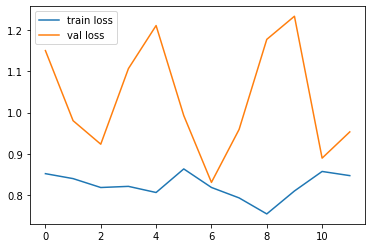

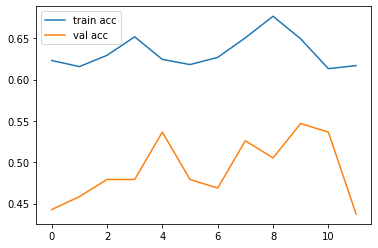

In [ ]:
# plot the loss
plt.plot(model_CNN_train.history['loss'], label='train loss')
plt.plot(model_CNN_train.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model_CNN_train.history['accuracy'], label='train acc')
plt.plot(model_CNN_train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.python.keras import Sequential
from keras.models import Model
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, rotation_range=180, horizontal_flip=True, vertical_flip=True, fill_mode='wrap',validation_split=0.2)

training_set = datagen.flow_from_directory(directory = 'patchedImagesPNG256x256/Train', target_size = (256, 256), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='training')

val_set = datagen.flow_from_directory(directory = 'patchedImagesPNG256x256/Train', target_size = (256, 256), shuffle = True,
                                             seed=42,batch_size = 32,class_mode = 'sparse',subset='validation')

Found 31087 images belonging to 4 classes.
Found 7770 images belonging to 4 classes.


### preprocess and train lung data 256x256

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil

In [ ]:
print(len(os.listdir('/patchedImagesPNG256x256/Train/normal')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/invasive')))

FileNotFoundError: ignored

In [ ]:
print('Toal: ', len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/normal')) +
                    len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both')) +
                        len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ')) +
                            len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/invasive')))

Toal:  38858


In [ ]:
# Create a dataframe containing all the information

image_list_3 = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ')
df_data_3 = pd.DataFrame(image_list_3, columns=['image_id'])

image_list_2 = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/invasive')
df_data_2 = pd.DataFrame(image_list_2, columns=['image_id'])

image_list_1 = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/normal')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_3, df_data_2, df_data_1, df_data_0])

In [ ]:
df_data.head()

### Augmentation

In [ ]:
image_size = 256

from keras.preprocessing.image import ImageDataGenerator

# create temporary directories here and delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)
# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# list all images in that directory
img_list = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ')

# copy images from the class all images directory to the image directory
for fname in img_list:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ', fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = 'aug_dir'
save_path = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ'

# create a data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[1.2, 1.325],
    fill_mode='reflect')

batch_size = 25

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='png',
                                          target_size=(image_size, image_size),
                                          batch_size=batch_size)

# generate the augmented images and add them to the folder of all images

num_aug_images_wanted = len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/invasive')) # total number of images wanted in each class

num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

for i in range(0, num_batches):
  next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')

Found 736 images belonging to 1 classes.


In [ ]:
import glob
removing_files = glob.glob('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/in_situ/*.jpg')
for i in removing_files:
    os.remove(i)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create temporary directories here and delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)
# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# list all images in that directory
img_list = os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both')

# copy images from the class all images directory to the image directory
for fname in img_list:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both', fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = 'aug_dir'
save_path = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/both'

# create a data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[1.2, 1.325],
    fill_mode='reflect')

batch_size = 25

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='png',
                                          target_size=(image_size, image_size),
                                          batch_size=batch_size)

# generate the augmented images and add them to the folder of all images

num_aug_images_wanted = len(os.listdir('/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train/invasive')) # total number of images wanted in each class

num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

for i in range(0, num_batches):
  next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')

Found 1040 images belonging to 1 classes.


### Create Train/Test/Valid batches

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/WIKM/OsteosarcomaData/Non-Tumor')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/OsteosarcomaData/Non-Viable-Tumor')))
print(len(os.listdir('/content/drive/MyDrive/WIKM/OsteosarcomaData/Viable')))

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, vertical_flip=True,validation_split=0.2)

training_set = datagen.flow_from_directory(directory = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train', target_size = (256, 256), shuffle = True,
                                             batch_size = 32,class_mode = 'sparse',subset='training')
val_set = datagen.flow_from_directory(directory = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train', target_size = (256, 256), shuffle = True,
                                             batch_size = 32,class_mode = 'sparse',subset='validation')

Found 28331 images belonging to 3 classes.
Found 7081 images belonging to 3 classes.


In [ ]:
x, y = training_set.next()
for i in range(0,5):
    image = x[i]
    label = y[i]
    if np.argmax(label, axis=0) == 0:
      print('Non-Tumor')
    if np.argmax(label, axis=0) == 1:
      print('Non-Viable Tumor')
    if np.argmax(label, axis=0) == 3:
      print('Viable')
    plt.imshow(image)
    plt.show()

In [ ]:
print(val_set.class_indices)

{'in_situ': 0, 'invasive': 1, 'normal': 2}


In [ ]:
class_weights={
    0: 1.0, # in_situ
    1: 1.0, # invasive
    2: 0.5, # normal
    # make model more sensitive to positive class if necessary
}

### Training Benchmark Model

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam

image_size = 256


benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
#benchmark.add(BatchNormalization())
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
#benchmark.add(BatchNormalization())
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
#benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#benchmark.add(BatchNormalization())
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
benchmark.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#benchmark.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
#benchmark.add(Dropout(0.35))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
benchmark.add(Dense(256, activation='relu'))
#benchmark.add(Dropout(0.5))
#benchmark.add(Dense(128, activation = 'relu'))
benchmark.add(Dense(3, activation='softmax'))
benchmark.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                      

In [ ]:
model = Sequential()
model.add(Conv2D(1024, (3, 3), activation="relu", input_shape=(256, 256, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 1024)    28672     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 1024)   0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 1024)    0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 512)     4719104   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 512)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 512)      

In [ ]:
from keras.optimizers import adam_v2
optimizer = adam_v2.Adam(learning_rate=1e-4)
benchmark.compile(loss='sparse_categorical_crossentropy',  optimizer=optimizer  , metrics=['accuracy'])

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='lung_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
step_size_train = training_set.n//training_set.batch_size
step_size_valid = val_set.n//val_set.batch_size

with tf.device('/device:GPU:0'):
  history_benchmark = benchmark.fit(training_set, steps_per_epoch = 26,
                                validation_steps = 26,
                                              class_weight=class_weights,
                                              validation_data=val_set,
                                              callbacks=[early_stopping_monitor, checkpointer_benchmark], 
                                              epochs=100, 
                                              verbose=1)

Epoch 1/100
 7/26 [=======>......................] - ETA: 29s - loss: 6.7096 - accuracy: 0.6429

KeyboardInterrupt: ignored

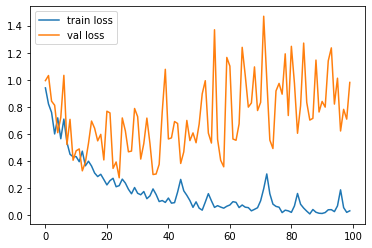

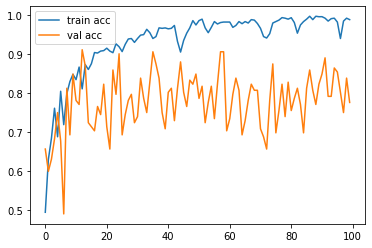

In [ ]:
# plot the loss
plt.plot(history_benchmark.history['loss'], label='train loss')
plt.plot(history_benchmark.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history_benchmark.history['accuracy'], label='train acc')
plt.plot(history_benchmark.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


### VGG MODEL NEW  LUNG

In [ ]:
import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
import tensorflow as tf
#from keras.applications import DenseNet201
from keras.applications import densenet

from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
import os

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, vertical_flip=True,validation_split=0.2)

training_set = datagen.flow_from_directory(directory = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train', target_size = (224, 224), shuffle = True,
                                             batch_size = 20,class_mode = 'sparse',subset='training')
val_set = datagen.flow_from_directory(directory = '/content/drive/MyDrive/WIKM/patchedImagesPNG256x256/Train', target_size = (224, 224), shuffle = True,
                                             batch_size = 20,class_mode = 'sparse',subset='validation')

Found 28331 images belonging to 3 classes.
Found 7081 images belonging to 3 classes.


In [ ]:
print(val_set.class_indices)
print(training_set.class_indices)

{'in_situ': 0, 'invasive': 1, 'normal': 2}
{'in_situ': 0, 'invasive': 1, 'normal': 2}


In [ ]:
from keras.optimizers import adam_v2
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam



optimizer = adam_v2.Adam(learning_rate=1e-4)
#model.compile(loss='sparse_categorical_crossentropy',  optimizer=optimizer  , metrics=['accuracy'])


def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(3, activation='softmax'))
    
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
resnet = keras.applications.densenet.DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


 


model = build_model(resnet ,lr = 1e-4)
model.summary()

74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 3)                 5763      
                                                         

In [ ]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.resnet.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
step_size_train = training_set.n//training_set.batch_size
step_size_valid = val_set.n//val_set.batch_size

with tf.device('/device:GPU:0'):
  history_benchmark = model.fit(training_set, steps_per_epoch = 26,
                                validation_steps = 26,
                                              validation_data=val_set,
                                              callbacks=[learn_control, checkpoint], 
                                              epochs=100, 
                                              verbose=1)

Epoch 1/100
26/26 [==============================] - 226s 7s/step - loss: 0.9179 - accuracy: 0.6385 - val_loss: 0.7111 - val_accuracy: 0.7462 - lr: 1.0000e-04
Epoch 2/100
26/26 [==============================] - 184s 7s/step - loss: 0.6467 - accuracy: 0.8121 - val_loss: 0.9287 - val_accuracy: 0.6154 - lr: 1.0000e-04
Epoch 3/100
26/26 [==============================] - 177s 7s/step - loss: 0.4608 - accuracy: 0.8615 - val_loss: 1.7530 - val_accuracy: 0.4365 - lr: 1.0000e-04
Epoch 4/100
 1/26 [>.............................] - ETA: 1:44 - loss: 0.8424 - accuracy: 0.7000

KeyboardInterrupt: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
from keras.optimizers import adam_v2
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam



optimizer = adam_v2.Adam(learning_rate=1e-4)
model.compile(loss='sparse_categorical_crossentropy',  optimizer=optimizer  , metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='lung_histopathology_vgg16_best.hdf5', verbose=1, save_best_only=True)


step_size_train = training_set.n//training_set.batch_size
step_size_valid = val_set.n//val_set.batch_size

with tf.device('/device:GPU:0'):
  history_benchmark = model.fit(training_set, steps_per_epoch = 26,
                                validation_steps = 26,
                                              validation_data=val_set,
                                              callbacks=[early_stopping_monitor, checkpointer_benchmark], 
                                              epochs=100, 
                                              verbose=1)

In [ ]:
import tensorflow as tf
print(tf.__version__) #need 2.7.0
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet

2.7.0


In [ ]:
class Config:
    # specify the shape of the inputs to our network (256 or 224 or 100)
    IMG_SHAPE = (224, 224, 3)

    # num of classes
    CLASSES = 3 #invasive, insitu, both for now

    BATCH_SIZE = 20 #32 
    EPOCHS = 50 #100
    INIT_LR = 0.0001

    BASE_OUTPUT = "output" #folder

    MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "resnet"])
    PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "resnetPlot.png"])

# instantiate the config class
config = Config()

In [ ]:
datagen = ImageDataGenerator(rotation_range=180, horizontal_flip=True, vertical_flip=True, fill_mode='wrap',validation_split=0.1)

training_set = datagen.flow_from_directory(directory = 'patchedImagesPNG256x256/Train', target_size = (224, 224), shuffle = True,
                                             batch_size = 20,class_mode = 'sparse',subset='training')
val_set = datagen.flow_from_directory(directory = 'patchedImagesPNG256x256/Train', target_size = (224, 224), shuffle = True,
                                             batch_size = 20,class_mode = 'sparse',subset='validation')

Found 31872 images belonging to 3 classes.
Found 3540 images belonging to 3 classes.


In [ ]:
### TRY NEXT


with tf.device('/device:GPU:0'):
    resnet = keras.applications.densenet.DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(config.IMG_SHAPE))
    for layer in resnet.layers:
        layer.trainable = False
    x = resnet.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    #x = AveragePooling2D((7,7))(x)
    #x = Flatten()(x)
    #x = Dense(521, activation='relu')(x)
    #x = Dropout(0.2)(x)
    #x = Dense(256, activation='relu')(x)
    #x = Dropout(0.2)(x)
    output = Dense(config.CLASSES, activation='softmax')(x)
    model = Model(resnet.input, output)

In [ ]:
criterion = tf.keras.optimizers.Adam(config.INIT_LR)

def build_model(backbone, lr=1e-4):
  model = Sequential()
  model.add(backbone)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3, activation = 'softmax'))

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = criterion,
      metrics = ['accuracy']
  )
  return model

In [ ]:
resnet = keras.applications.densenet.DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(config.IMG_SHAPE))

model = build_model(resnet, lr = 1e-4)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_5   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1920)             7680      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 3)                 5763      
                                                                 
Total params: 18,335,427
Trainable params: 18,102,531


In [ ]:
with tf.device('/device:GPU:0'):
    resnet = keras.applications.densenet.DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(config.IMG_SHAPE))
    


In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='lung_histopathology_resnet50_best.hdf5', verbose=1, save_best_only=True)

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [ ]:
#tf.keras.optimizers.schedules.ExponentialDecay(...) do it later https://keras.io/api/optimizers/
#criterion = tf.keras.optimizers.Adam(config.INIT_LR)
#print("compiling model")
#model.compile(loss="sparse_categorical_crossentropy", optimizer=criterion, metrics=["accuracy"])
print("training model")
history = model.fit(training_set, validation_steps = 26, epochs=50, steps_per_epoch=26, validation_data=val_set, verbose=1)

training model
Epoch 1/50
26/26 [==============================] - 229s 8s/step - loss: 0.8389 - accuracy: 0.6462 - val_loss: 1.1351 - val_accuracy: 0.5365
Epoch 2/50
26/26 [==============================] - 193s 7s/step - loss: 0.5701 - accuracy: 0.8096 - val_loss: 1.2063 - val_accuracy: 0.6327
Epoch 3/50
26/26 [==============================] - 171s 7s/step - loss: 0.5932 - accuracy: 0.8212 - val_loss: 1.9776 - val_accuracy: 0.5635
Epoch 4/50
26/26 [==============================] - 164s 6s/step - loss: 0.4968 - accuracy: 0.8500 - val_loss: 6.1252 - val_accuracy: 0.3538
Epoch 5/50
26/26 [==============================] - 164s 6s/step - loss: 0.4703 - accuracy: 0.8615 - val_loss: 9.7563 - val_accuracy: 0.3135
Epoch 6/50
17/26 [==================>...........] - ETA: 37s - loss: 0.3263 - accuracy: 0.9029

KeyboardInterrupt: ignored